In [67]:
import gym
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

# Taxi World

In [2]:
env = gym.make("Taxi-v2")

Let's experiment with how adjusting the learning rate affects the rewards.

In [65]:
average_rewards = []  # Average total reward from one training epoch
episodes = 1000       # Number of episodes to train the agent
alphas = []           # Tested learning rates
alpha_counter = 0     # Learning rate

while alpha_counter < 20:
    alpha_counter += 1  # Use ints to avoid floating point errors
    Q = np.zeros([env.observation_space.n, env.action_space.n])  # Q function table
    total_reward = 0
    alpha = alpha_counter/10.0
    
    for episode in range(1, episodes):
        done = False
        G, reward = 0, 0
        state = env.reset()

        while done != True:
                action = np.argmax(Q[state])
                next_state, reward, done, info = env.step(action)
                Q[state, action] += alpha * (reward + np.max(Q[next_state]) - Q[state, action])
                G += reward  # Update cumulative reward (no discounting)
                state = next_state  # State transition
                
        total_reward += G
    
    average_rewards.append(total_reward/episodes)
    alphas.append(str(alpha))

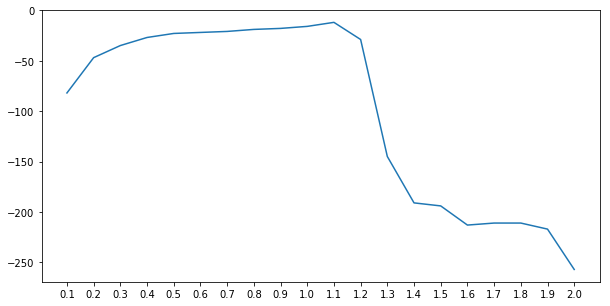

In [68]:
plt.plot(alphas, average_rewards)